In [12]:
import pandas

data = pandas.read_csv(open('singscore/test/test_data/entrezCountsTable.csv', 'r'), header='infer', sep=',')
data = data.set_index(keys='EntrezID')


In [8]:
sigs = pandas.read_csv(open('singscore/test/test_sigs/tgfb_upDown.txt', 'r'), header = 'infer', sep = '\t')


In [9]:
# This signature is in both up and down direction, so subset based on the direction of the gene-set

up = sigs[sigs['upDown'] == 'up']
down = sigs[sigs['upDown'] == 'down']

In [10]:
# and get a list of ids. Alternatively, a path to the up and/or down signatures may be supplied. The target file should be a text file, with each identifier on a new line and with no headings or other characters.

up = list(up['EntrezID'])
down = list(down['EntrezID'])

In [18]:
from singscore.singscore import *

In [20]:
# For scoring both single direction (up-regulated) signatures as well as bi-directional signatures may be used. Only up_gene is a required argument

scored_data_single = score(up_gene=up, sample=data, norm_method='theoretical', full_data=True)

scored_data_both = score(up_gene=up, down_gene=down,sample=data, norm_method='theoretical', full_data=True)

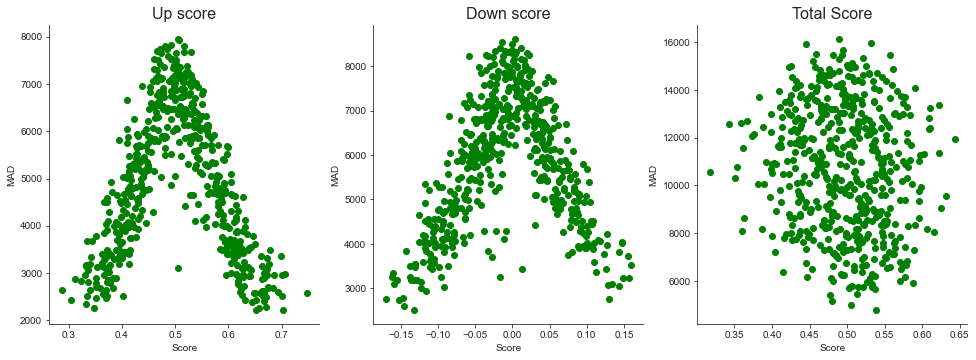

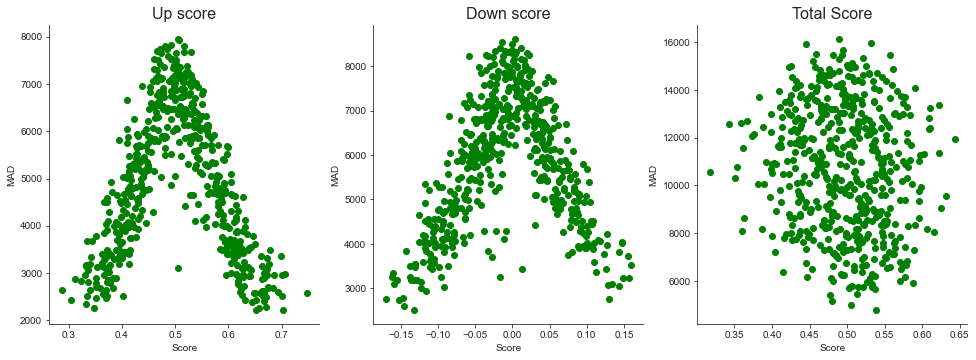

In [38]:
%matplotlib inline
plotdispersion(scored_data_both, teststring='TGFb',
                testlabel='TGFb',colour_1='g', colour_2='b',show=True)


In [37]:
ranked_data = rank(up_gene=up, down_gene=down, sample=data[['TB04112018TC-T1_TD00643']],
                      norm_method='theoretical')


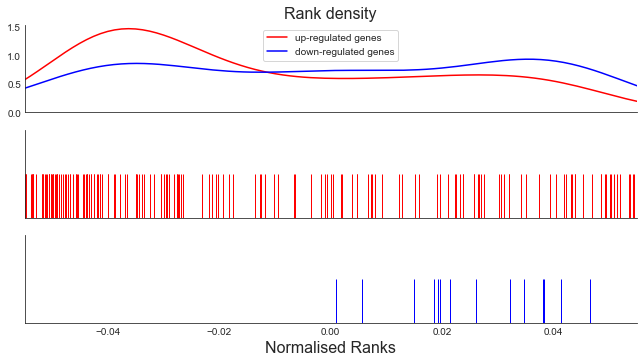

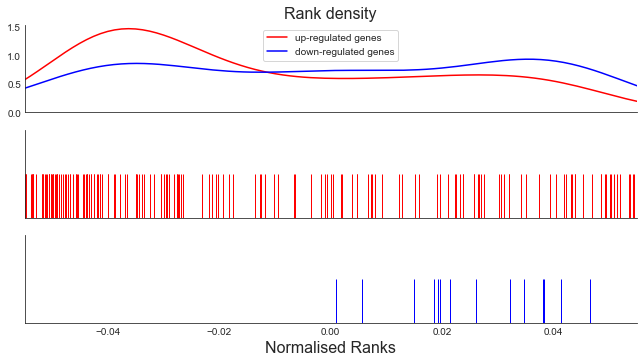

In [34]:
%matplotlib inline
plotrankdist(ranks=ranked_data, colour_1='r', colour_2='b', show=True)

In [51]:
%matplotlib inline
# data
# data.shape

permd = permutate(data, n_up=193, n_down=108)
pvals = empiricalpval(permutations=permd, score=scored_data)

nulldistribution(permutations=permd, score=scored_data, nrows=14713, ncols=537, threshold=0.05, show=True)


ValueError: operands could not be broadcast together with shapes (4,) (2,) 